In [2]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
from numpy import matlib
import math
import timeit

%load_ext autoreload
%autoreload 2

In [3]:
DATA = 1
PT = True
if PT: 
    from pre_train import *
else:
    from main5 import * 
X_train, Y_train = load_data(DATA)

In [4]:
tf.reset_default_graph()
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 240, 420, 3])
    Y = tf.placeholder(tf.float32, [None, 240, 420, 1])
LR = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)
if PT: 
    output = DACNet(Y,DATA)
else: 
    output = DACNet(X,DATA)
loss = tf.nn.l2_loss(output-Y)
mean_loss = tf.reduce_mean(loss)

In [6]:

sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))
saver = tf.train.Saver()
# writer = tf.summary.FileWriter('./tb',sess.graph)
sess.run(tf.global_variables_initializer())
if DATA == 1:
    saver.restore(sess, './Models/PT_data_1_epochs_2_batchsize_5_rate_0.001_decay_1.0')
if DATA == 0:
    saver.restore(sess, './Models/NYU/data_0_epochs_2_batchsize_3_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./Models/PT_data_1_epochs_2_batchsize_5_rate_0.001_decay_1.0


In [7]:
for var in tf.global_variables():
    print(var)
    print(var.eval(session=sess))

<tf.Variable 'c1/kernel:0' shape=(3, 3, 1, 64) dtype=float32_ref>
[[[[  8.11650753e-02  -7.79751763e-02   1.01853140e-01   2.52929553e-02
     -2.91642305e-02   2.76082437e-02  -8.03043470e-02  -3.10225948e-03
     -8.62413570e-02  -7.40484968e-02  -3.11239995e-03   7.66606303e-03
      6.98527023e-02   6.45615831e-02   4.04226482e-02   5.01062814e-03
      4.56292033e-02  -5.06582186e-02  -4.56723938e-05  -1.65909678e-02
      5.27790701e-03   8.48394409e-02  -2.78623030e-02  -8.08550492e-02
     -4.74788025e-02  -7.22296834e-02   6.07129969e-02   8.50731358e-02
      7.52412975e-02   6.50226176e-02   2.71949954e-02   6.89951777e-02
      6.90576136e-02   5.46228513e-02   3.94024327e-02   9.96926576e-02
     -2.39360472e-03  -1.75792780e-02  -2.08998099e-02   1.41650951e-02
     -5.55876866e-02   3.37050855e-02  -2.98073012e-02  -2.08279677e-02
     -8.47041532e-02  -4.67870943e-03  -8.91996324e-02  -7.09608272e-02
     -3.23886313e-02  -9.27693248e-02   4.75222878e-02  -8.79227147e-0

1977.54


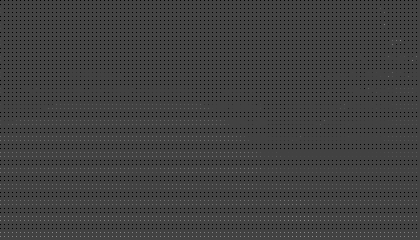

In [8]:
i = 7
IMG, img_loss = sess.run([output, mean_loss], {X: X_train[i:i+1,:,:,:],
                                          Y: Y_train[i:i+1,:,:,:],
                                             is_training: False})
print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG)*255.0))

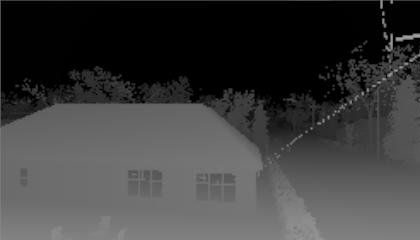

In [10]:
Image.fromarray(np.uint8(np.squeeze(Y_train[i,:,:,:]*255.0)))

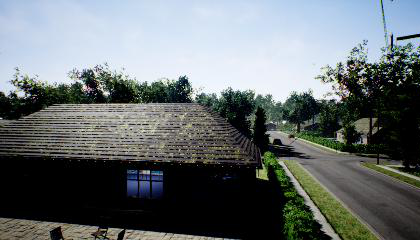

In [11]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))